# Photovoltaik

Mögliche Fragestellungen:
* Umrechnen von Zeiteinheiten
* Umrechnung von Flächeneinheiten
* Umrechnung von Energieeinheiten
* Leistung auf flächenspezifischer Leistung und Fläche
$$ \dot{E} = \dot{E''} \cdot A $$
* Anteil genutzter an verfügbarer Leistung
* Maschenregel und Knotenregel für Module aus Zellen
* Leistung aus Strom und Spannung
* Füllfaktor aus Kurzschlussstrom, Leerlaufspannung und Maximum Power Point (MPP)
$$ FF = \frac{P_{MPP}}{I_{Kurzschluss}\cdot U_{Leerlauf}} $$
* Stromgestehungskosten nach der Annuitäten-Mehtode
$$ a = K_{ges} \cdot \frac{i\cdot (1+i)^n}{(1+i)^n - 1} $$
* Wirkungsgrade von Anlagenkomponenten
* Benötigte Modulfläche für Nettostromerzeugung

* Sonnenstunden pro Jahr an einem bestimmten Ort
* Stefan-Boltzmann-Gesetz
$$ \phi_S(T) = \sigma\cdot\varepsilon\cdot T_S^4 $$
* Winkelabhängigkeit der Einstrahlung
* Planck'scher Strahler
* Strohmdichte
* Energierücklaufzeiten
* Speicherung
* Thermische Spannung $ U_{therm.} = \frac{kT}{q} $
* IV-Kurve mit Idealitätsfaktor  $n$
$$ I = I_L - I_0 \cdot \left[ \exp\left(\frac{U}{n\cdot U_{therm.}}\right) - 1 \right] $$
    und mit zusätzlichen Widerständen
$$ I = I_L - I_0 \cdot \left[ \exp\left(\frac{U + I\cdot R_{Serie}}{n\cdot U_{therm.}}\right) - 1 \right] - \frac{U - I\cdot R_{Serie}}{R_{Parallel}} $$
* Leerlaufspannung
$$ U_{Leerlauf} = n\cdot U_{therm.} \cdot \ln\left(\frac{I_L}{I_0} + 1 \right) $$
* Füllfaktor $ \frac{\mathrm{d}IV}{\mathrm{d}V} = 0 \Rightarrow MPP \Rightarrow FF  $ 
* Effizienz $ \eta = \frac{I_{Kurzschluss}V_{Leerlauf}FF}{\phi_S A} $

Zum **Nachlesen** wird die folgende [PV Lernseite (*auf Englisch*)](http://www.pveducation.org/pvcdrom)
empfohlen.

Es werden nicht alle Punkte der obigen Liste in der Übung behandelt, sie können dennoch prüfungsrelevant sein.

In [1]:
%display latex

## 1. Flächeneinstrahlung
Welche Leistung wird im Durchschnitt pro Jahr am äußeren Atmosphärenrand auf die
Fläche Deutschlands eingestrahlt bei einer jahresdurchschnittlichen Tagesdauer 
von genau $12$ Stunden? 
(Fläche Dtl.: $A_{Dtl} = 3,57\times 10^5\, km^2$; Solarkonstante $E_0 = 1367\, W/m^2$ ).

In [2]:
# SI-Einheiten
Meter = var('Meter')
kg = var('kg')
Kelvin = var('Kelvin')
Sekunde = var('Sekunde')
Joule = var('Joule')

# Abgeleitete Einheiten
km = 1000 * Meter
Minute = 60 * Sekunde
Stunde = 60 * Minute
Tag = 24 * Stunde
Jahr = 365 * Tag
Woche = 7 * Tag
Watt = Joule / Sekunde
kWh = 1000 * Watt * Stunde

# Berechnung
Flaeche = 3.57e+5 * km**2
Solarkonstante = 1367 * Watt / Meter**2
mittlereSonnenscheindauer = 12 * Stunde / Tag
Leistung = Solarkonstante * Flaeche * mittlereSonnenscheindauer

# Leistung in W
Leistung / Watt

2.44009500000000e14

Vergleichen Sie diesen Wert mit der mittleren Strahlungsleistung über die Fläche Deutschlands
($4,11\times 10^{13}\, W$). 
Wie Groß ist der Anteil an der zuvor berechneten theoretischen Leistung?
Diskutieren Sie was diese Reduktion beeinflusst.

In [3]:
LeistungDeutschland = 115 * Watt / Meter**2 * Flaeche
Anteil = LeistungDeutschland / Leistung

# Anteil in %
Anteil * 100

16.8251645940015

Vergleichen Sie die Strahlungsleistung in Deutschland mit dem Primärenergiebedarf in Deutschland
($13,3 \times 10^{18}\, J/a$, Stand 2015, BMWi).

In [4]:
Primaerenergiebedarf = 13.3e+18 * Joule / Jahr
Anteil = Primaerenergiebedarf / LeistungDeutschland

# Anteil in %
Anteil * 100

1.02725668830610

## 2. Diodenkennlinie
Wir starten mit der allgemeinen PV-Diodenkennlinie mit einem zusätzlichen Serienwiderstand.

In [5]:
# SI-Einheiten
Ampere = var('Ampere')
Volt = var('Volt')
Coulomb = Ampere * Sekunde
Ohm = Volt / Ampere

# Abgeleitete Einheiten
Eins = Volt * Ampere * Sekunde / Joule

# Konstanten
BoltzmannKonstante = 1.38064852e-23 * Joule / Kelvin
Ladung = 1.6021766208e-19 * Coulomb

# Variablen
AbsTemp = var('AbsTemp')
Strom = var('Strom')
Photostrom = var('Photostrom')
Saettigungsstrom = var('Saettigungsstrom')
Spannung = var('Spannung')
Serienwiderstand = var('Serienwiderstand')
Idealitaetsfaktor = var('Idealitaetsfaktor')

# Formeln
ThermischeSpannung = BoltzmannKonstante * AbsTemp / Ladung * Eins
ImpliziteGleichung = Strom == (
    Photostrom 
    - Saettigungsstrom * (
        exp((Spannung + Strom * Serienwiderstand)/(Idealitaetsfaktor * ThermischeSpannung))
        - 1
    )
)
ImpliziteGleichung

Strom == -Saettigungsstrom*(e^(11604.5220604010*(Serienwiderstand*Strom + Spannung)*Kelvin/(AbsTemp*Idealitaetsfaktor*Volt)) - 1) + Photostrom

Nehmen Sie eine PV-Diode ähnlich dem 
[Sunmodule+ SW 240 poly](https://www.vanderbilt.edu/love-circle/wp-content/uploads/sites/147/2016/09/solarpaneldatasheet.pdf)
von SOLARWORLD mit den folgenden Eigenschaften an:

* Sättigungsstrom $I_0 = 10^{-10}\, A$
* Idealitätsfaktor $n = 1$
* Serienwiderstand $R_{serie} = 0.001\, \Omega$

Um die Strom-Spannungskennlinie (*IV-Kurve*) berechnen zu können, muss für das PV-Modul ein Umwandlungsfaktor 
zwischen Strahlungsleistung und elektrischem Strom abgeschätzt werden.

In [6]:
# Abgeleitete Einheiten
cm = Meter / 100
Inch = 2.54 * cm

# Modul Eigenschaften
AnzahlZellen = 60
Modulflaeche = AnzahlZellen * (6.14 * Inch)**2
Umwandlungsfaktor = 1/173 * Ampere / Watt

# Neue Variablen
T = var('T')
U = var('U')
EG = var('EG')

# Formel des Moduls
ModulGleichung = (
    ImpliziteGleichung.subs({
        Photostrom:Umwandlungsfaktor * EG * (Watt / Meter**2) * Modulflaeche
        ,Saettigungsstrom:1e-10 * Ampere
        ,Idealitaetsfaktor:1
        ,Serienwiderstand:0.001 * Ohm
        ,AbsTemp:(273.15 * Kelvin + T * Kelvin)
        ,Spannung:U * Volt / AnzahlZellen
        ,Strom:Strom * Ampere
    }) / Ampere
    ).factor()
ModulGleichung

Strom == 254849/30211592*EG - 1/10000000000*e^(1271134977/5476895*Strom/(20*T + 5463) + 4237116590/1095379*U/(20*T + 5463)) + 1/10000000000

Vergleichen Sie unser PV-Modul mit dem aus dem oben erwähnten Datenblatt.
Stellen Sie hierzu die *IV-Kurve* für $6$ Strahlungsleistungen bei $25\, °C$ in einem Diagramm dar und diskutieren Sie die Unterschiede zum Datenblatt. Als Anregung dazu können Sie sich die Gleichungen _online_ bei
[pveducation.org](http://www.pveducation.org/pvcdrom/series-resistance)
nochmal ansehen.

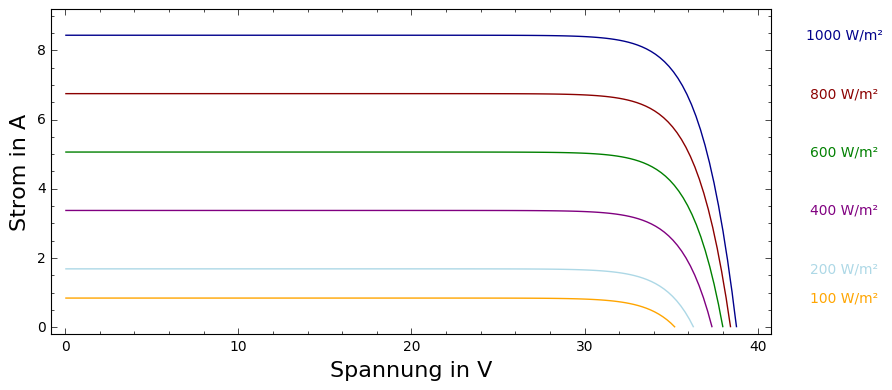

In [7]:
# Die Kennlinie wird bei 25 °C betrachtet
IV = ModulGleichung(T = 25)

# Es wird ein Grafikobjekt erzeugt und die Gleichung darin dargestellt
G = Graphics()
i = 0
color = ('darkblue', 'darkred', 'green', 'purple', 'lightblue', 'orange')
for Strahlung in (1000, 800, 600, 400, 200, 100):
    Kurzschlussstrom = find_root(IV(EG=Strahlung,U=0),0,10)
    Leerlaufspannung = find_root(IV(EG=Strahlung,Strom=0),0,AnzahlZellen)
    G += implicit_plot(IV(EG=Strahlung),(U,0,Leerlaufspannung),(Strom,0,Kurzschlussstrom),rgbcolor=color[i])
    G += text(u'{} W/m²'.format(Strahlung),(45,Kurzschlussstrom),rgbcolor=color[i])
    i += 1
G.axes_range(0,40,0,9)
G.set_aspect_ratio(2)
G.axes_labels(['Spannung in V','Strom in A'])
G.show()

Stellen Sie für eine Strahlungsleistung den optimalen Betriebspunkt, den sogenannten MPP, dar.
Bestimmen Sie mit dem MPP den Füllfaktor des Moduls.

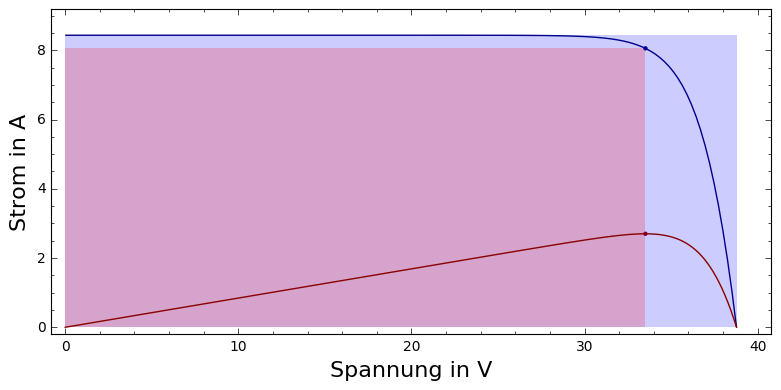


Füllfaktor 82.5 %
Kurzschlussstrom 8.4 A
Leerlaufspannung 38.8 V
Optimaler Betriebspunkt:
Strom 8.1 A
Spannung 33.5 V
Leistung 270.0 W
Effizienz 15.3 %



In [8]:
# Strahlungsstärke
Strahlung = 1000
Kurzschlussstrom = find_root(IV(EG=Strahlung,U=0),0,10)
Leerlaufspannung = find_root(IV(EG=Strahlung,Strom=0),0,AnzahlZellen)
Spannung = IV(EG=Strahlung).solve(U, to_poly_solve = True)[0].rhs()

# Grafik
G = Graphics()
# IV-Kurve
G += implicit_plot(IV(EG=Strahlung),(U,0,Leerlaufspannung),(Strom,0,Kurzschlussstrom),rgbcolor=color[0])
# Fläche der Referenzleistung
G += polygon([(0,0),(Leerlaufspannung,0),(Leerlaufspannung,Kurzschlussstrom),(0,Kurzschlussstrom)]
            ,rgbcolor='blue'
            ,alpha=.2
            )
# Skalierte Leistungskurve (Faktor 100)
G += parametric_plot((Spannung,Strom*Spannung/100),(Strom,0,Kurzschlussstrom),rgbcolor=color[1])
# Bestimmung der maximalen Leistung aus der Leistungskurve
Line = G[2]
ymax = Line.get_minmax_data()['ymax']
for L in Line:
    if L[1] == ymax:
         UMPP = L[0]
    else:
        pass
# Strom am optimalen Betriebspunkt
IMPP = find_root(IV(EG=Strahlung,U=UMPP),0,10)
G += point([UMPP,IMPP],rgbcolor=color[0])
G += point([UMPP,ymax],rgbcolor=color[1])
# Fläche der maximalen Leistung
G += polygon([(0,0),(UMPP,0),(UMPP,IMPP),(0,IMPP)]
            ,rgbcolor='red'
            ,alpha=.2
            )
G.axes_range(0,40,0,9)
G.set_aspect_ratio(2)
G.axes_labels(['Spannung in V','Strom in A'])
G.show()

# Füllfaktor in %
Fuellfaktor = UMPP * IMPP / (Leerlaufspannung * Kurzschlussstrom) * 100

# Effizienz in %
Effizienz = float(Fuellfaktor *  UMPP * IMPP / (Strahlung * Modulflaeche / Meter**2))

# Antwort
print """
Füllfaktor {:.1f} %
Kurzschlussstrom {:.1f} A
Leerlaufspannung {:.1f} V
Optimaler Betriebspunkt:
Strom {:.1f} A
Spannung {:.1f} V
Leistung {:.1f} W
Effizienz {:.1f} %
""".format(Fuellfaktor,
           Kurzschlussstrom,
           Leerlaufspannung,
           IMPP,
           UMPP,
           IMPP*UMPP,
           Effizienz)

Erklären Sie warum die bei einer Angabe der Strahlungsleistung immer auch die Luftmasse genannt werden muss.

## 3. Kostenrechnung
Für eine erste Abschätzung einer Kostenkalkulation eines Solarparks mit einer maximalen Leistung von $300\, kW_p$ sind folgende Teillösungen zu ermitteln.

### a) Annuitäten
Gehen Sie von der folgenden Kostenstruktur aus:
* Modulkosten: $2250\, \frac{€}{kW_p}$
* Wechselrichterkosten: $400\, \frac{€}{kW}$;  
    Da es unwahrscheinlich ist, dass alle Module gleichzeitig ihre maximale Leistung abgeben, 
    genügt es $90\,\%$ der maximalen Leistung zu installieren.
* Sonstige Kosten für Montage und Material werden pauschal mit $30\,\%$ der Summe der ersten beiden Positionen veranschlagt.

Der Kredit für die Investitionskosten wird über eine Lebensdauer von $25$ Jahren mit einem Zinzsatz von $4\,\%$ abbezahlt. 
Bei der Methode konstanter Annuitäten wird jährlich der gleiche Betrag (_Annuität_) abbezahlt. Dadurch sinkt der Anteil der Zinslast jedes Jahr.

In [9]:
# Einheiten
Euro = var('Euro')

# Kosten
MaximaleLeistung = 300 * 1000 * Watt
Modulkosten = 2250 * Euro / (1000 * Watt)
Wechselrichterkosten = 400 * Euro / (1000 * Watt)
AnteilSonstige = 0.3

# Investionskosten
Investitionskosten = MaximaleLeistung * (Modulkosten + Wechselrichterkosten * 0.9) * (1 + AnteilSonstige)
print 'Investitionskosten: {:.3f} Mio. €'.format(float(Investitionskosten/(1e+6 * Euro)))

# Annuitäten und Gesamtkosten
Zins = 0.04
Dauer = 25
Zinssatz = var('Zinssatz')
Lebensdauer = var('Lebensdauer')
Annuitaet = Investitionskosten * Zinssatz * (1 + Zinssatz)**Lebensdauer / ((1 + Zinssatz)**Lebensdauer - 1) / Jahr
Gesamtkosten = Annuitaet * Lebensdauer * Jahr

print 'Annuität: {:.0f} €/a'.format(float(Annuitaet(Zinssatz=Zins,Lebensdauer=Dauer) / (Euro / Jahr)))
print 'Gesamtkosten: {:.3f} Mio. €'.format(float(Gesamtkosten(Zinssatz=Zins,Lebensdauer=Dauer) / (1e+6*Euro)))

Investitionskosten: 1.018 Mio. €
Annuität: 65158 €/a
Gesamtkosten: 1.629 Mio. €


### b) Jährlicher Energieertrag
Gehen Sie von den folgenden Wirkungsgraden und einer mittleren Einstrahlung aus:
* Modulwirkungsgrad $14\,\%$
* Wechselrichterwirkungsgrad $91.5\,\%$
* Mittlere Strahlung $115\, \frac{W}{m^2}$
* Modulfläche $3000\,m^2$


In [10]:
Modulwirkungsgrad = 0.14
Wechselrichterwirkungsgrad = 0.915
MittlereStrahlung = 115 * Watt / Meter**2
Modulflaeche = 3000 * Meter**2

# Berechnung
JaehrlicheEnergieertrag = Modulflaeche * MittlereStrahlung * Modulwirkungsgrad * Wechselrichterwirkungsgrad
print 'Jährlicher Energieertrag: {:.0f} MWh/a'.format(float(JaehrlicheEnergieertrag / (1000 * kWh / Jahr)))

Jährlicher Energieertrag: 387 MWh/a


### c) Stromgestehungskosten
Berechnen Sie die Stromgestehungskosten aus den Annuitäten und dem jährlichen Energieertrag.
Stellen Sie die Abhängigkeit der Stromgestehungskosten vom Zinssatz in einem Diagramm dar 
und diskutieren Sie, ab unter welchen Bedingungen sich die Investition lohnen würde.

Stromgestehungskosten: 17 ct/kWh


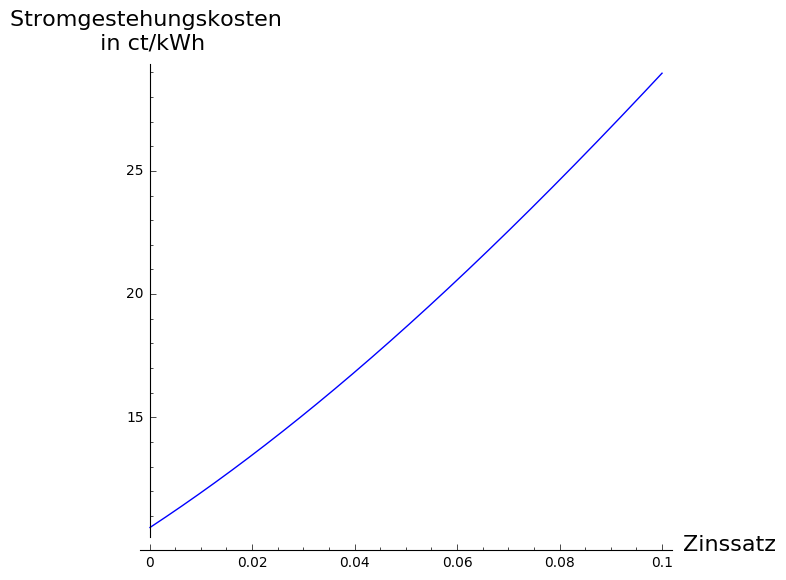

In [11]:
# Abgeleitete Einheit
cent = Euro / 100
print 'Stromgestehungskosten: {:.0f} ct/kWh'.format(
    float(Annuitaet(Zinssatz=Zins,Lebensdauer=Dauer) / JaehrlicheEnergieertrag / (cent / kWh)))
G = Graphics()
G += plot(Annuitaet(Lebensdauer=Dauer) / JaehrlicheEnergieertrag / (cent / kWh), Zins, 0.0001, 0.1)
G.axes_labels(['Zinssatz','Stromgestehungskosten \n in ct/kWh'])
G.show()

---